# Housing Sale Price Prediction

**Problem**: Predicting Housing Sale Prices from given features <br>
**Problem** Type: Regression<br>
**Features**: Categorical and Numerical<br>
**Label**: Sale Price (Integer)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns',100)

In [34]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [35]:
train['train/test'] = 1
test['train/test'] = 0
housing_df = pd.concat([train,test],axis=0,sort=False)

In [36]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train/test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [37]:
housing_df.shape

(2919, 82)

There are 80 features. <br>
There are 1460 records in the training dataset
Total 2918 records

In [38]:
housing_df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train/test
183,1644,60,FV,NaN,8470,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,225.0,ALQ,276.0,471.0,972.0,GasA,Ex,Y,SBrkr,972,839,0,1811,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,565.0,TA,TA,Y,225,48,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,NaN,0
296,1757,20,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1959,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403.0,Unf,0.0,461.0,864.0,GasA,Ex,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1960.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,NaN,0
143,1604,120,RM,44.0,3811,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Artery,Norm,TwnhsE,1Story,8,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,186.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1373.0,Unf,0.0,221.0,1594.0,GasA,Ex,Y,SBrkr,1646,0,0,1646,1.0,1.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2004.0,Fin,2.0,525.0,TA,TA,Y,128,53,0,0,155,0,NaN,NaN,NaN,0,5,2010,WD,Normal,NaN,0


In [39]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [40]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train/test
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


Split columns into categorical and numerical

In [41]:
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
train/test          0
Length: 82, dtype: int64

In [42]:
columns = housing_df.columns
col_num = list(housing_df.describe().columns)
col_cat = list(set(columns).difference(col_num))
col_na = housing_df.columns[housing_df.isna().any()]
print('numerical columns: %d \ncategorical columns: %d' %(len(col_num),len(col_cat)))

numerical columns: 39 
categorical columns: 43


Numerical Columns - Histogram <br>
Categorical Columns - Value_count

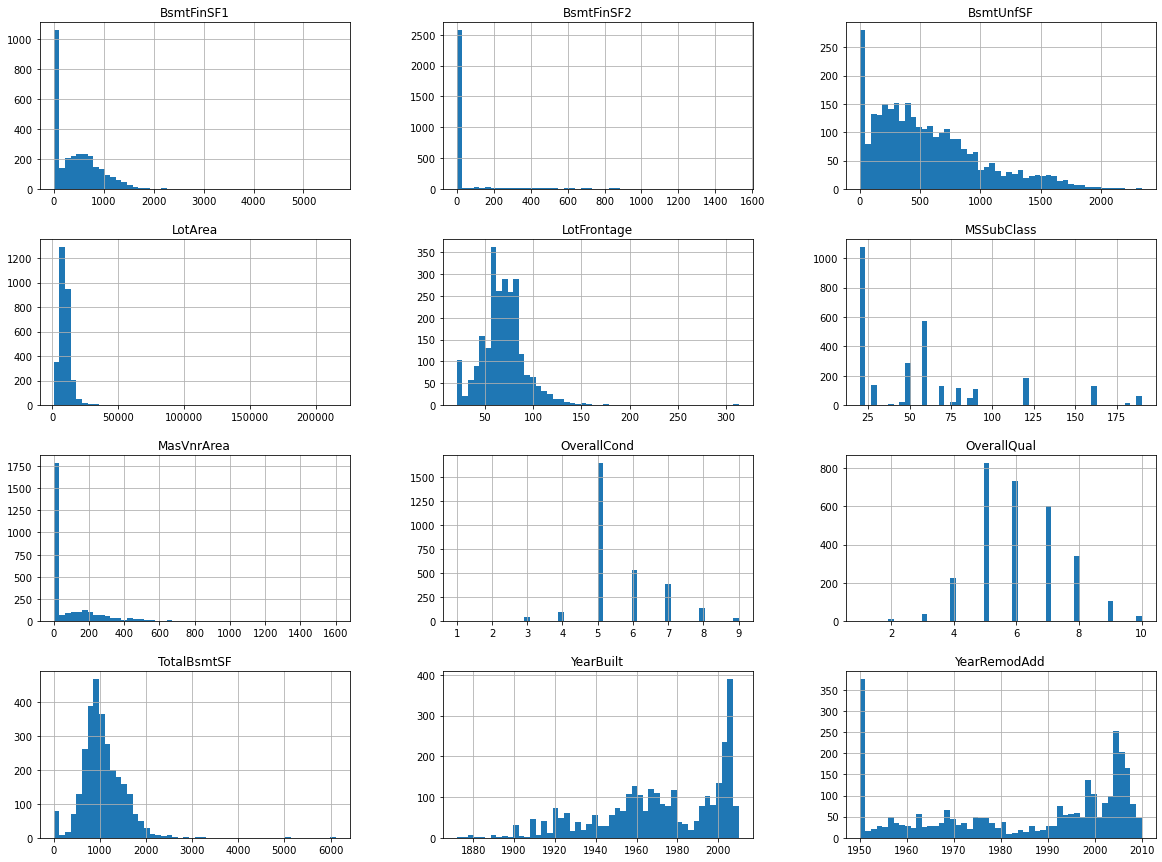

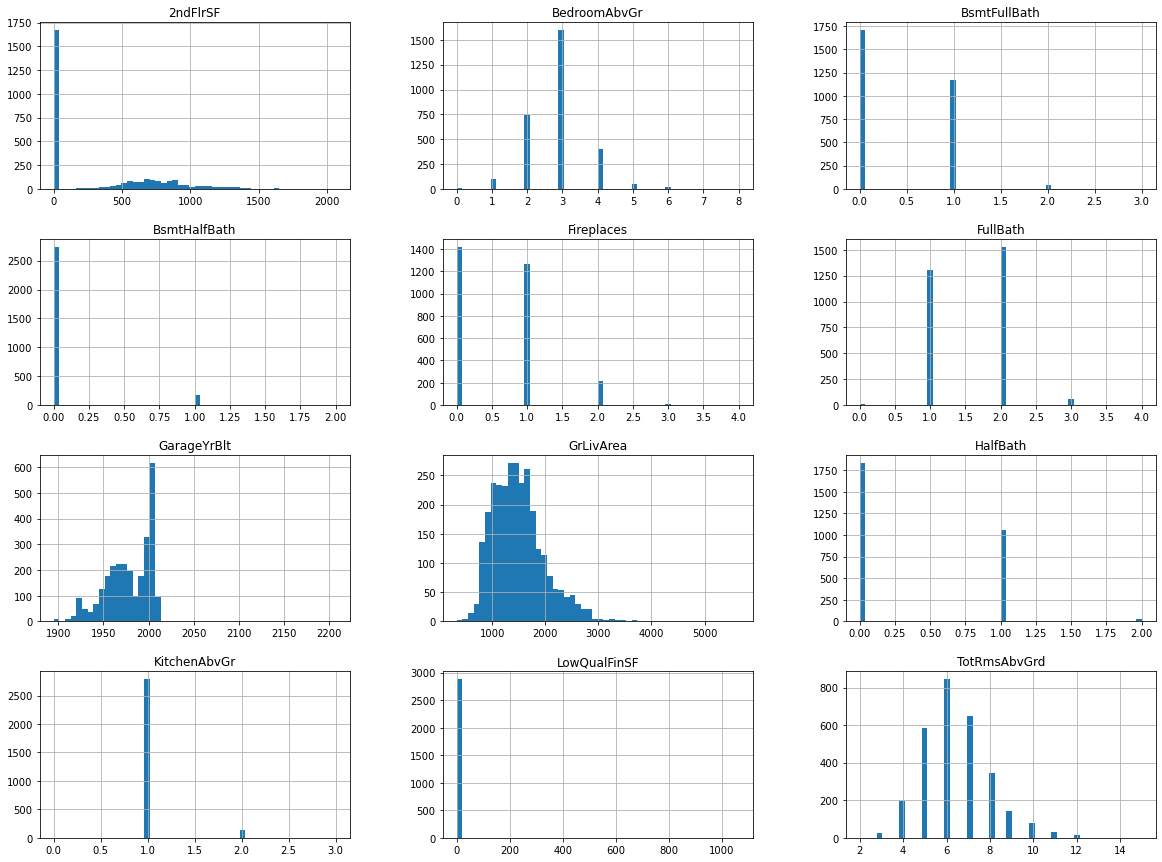

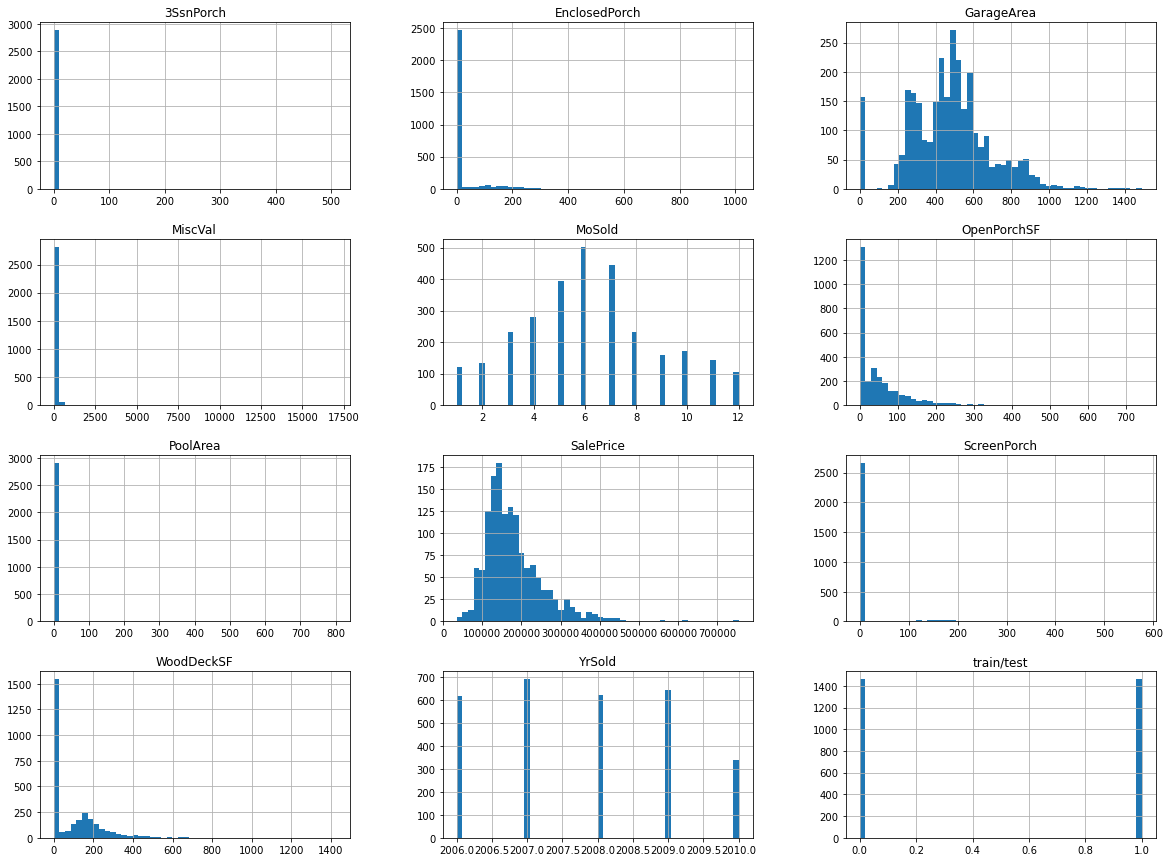

In [43]:
for i in range(3):
    split = len(col_num)/3
    housing_df[col_num[int(i*split+1):int((i+1)*split)]].hist(bins=50, figsize=(20,15))

In [44]:
housing_df.groupby('train/test').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
train/test,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1459,1459,1455,1232,1459,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1444,1459,1459,1459,1415,1414,1415,1417,1458,1417,1458,1458,1458,1459,1459,1459,1459,1459,1459,1459,1459,1457,1457,1459,1459,1459,1459,1458,1459,1457,1459,729,1383,1381,1381,1458,1458,1381,1381,1459,1459,1459,1459,1459,1459,1459,3,290,51,1459,1459,1459,1458,1459,0
1,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1379,1379,1379,1460,1460,1379,1379,1460,1460,1460,1460,1460,1460,1460,7,281,54,1460,1460,1460,1460,1460,1460


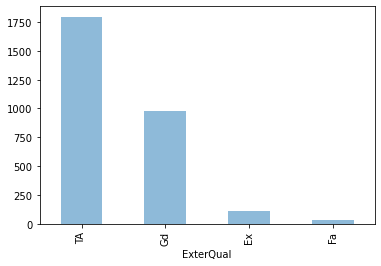

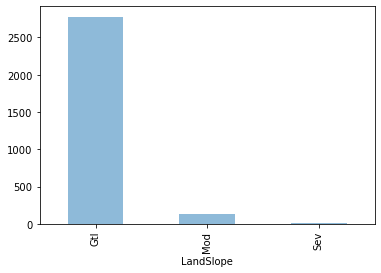

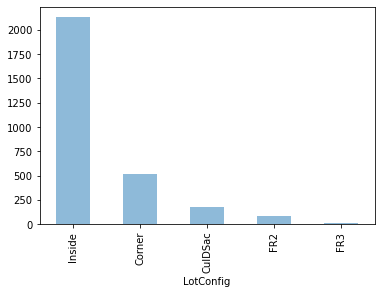

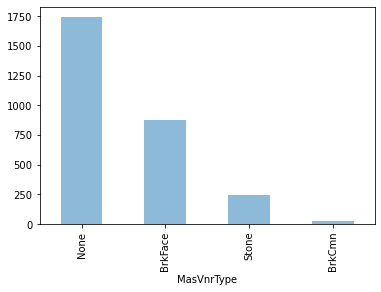

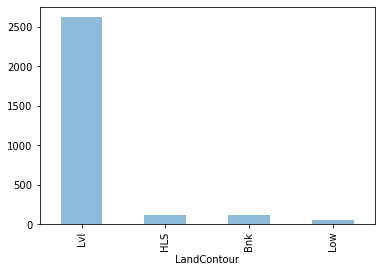

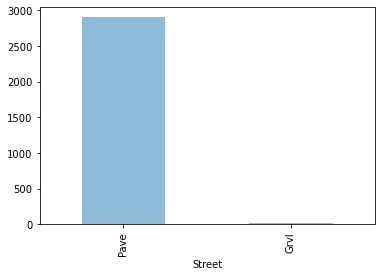

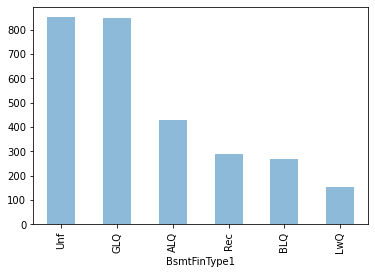

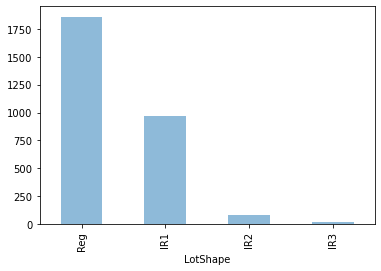

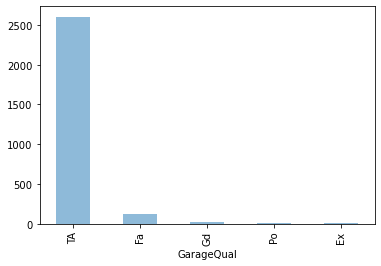

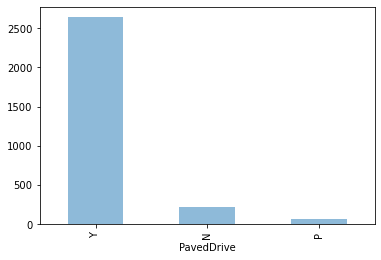

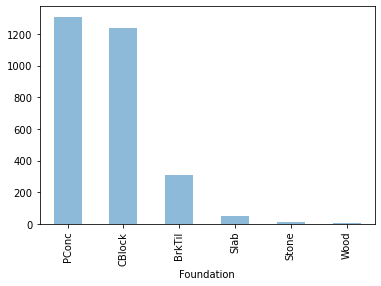

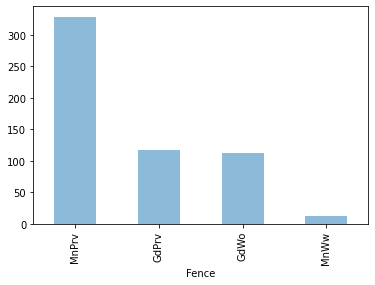

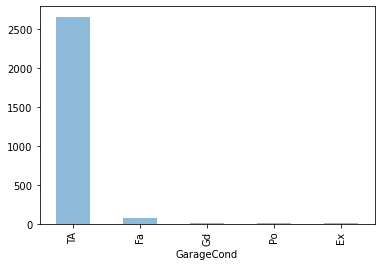

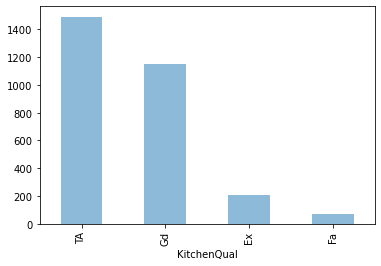

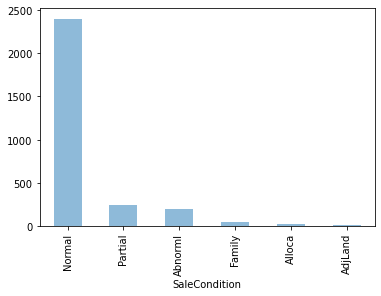

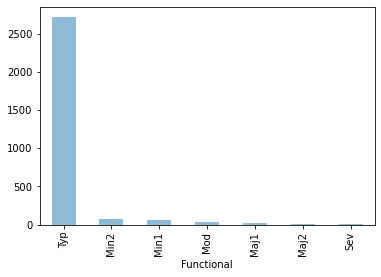

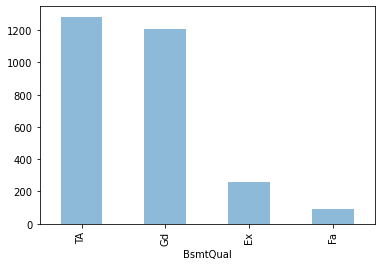

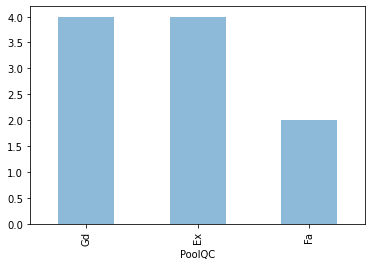

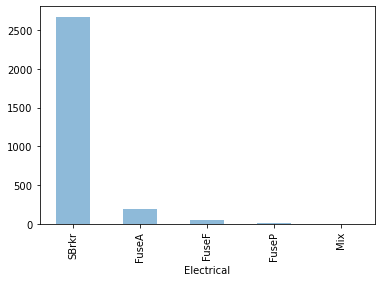

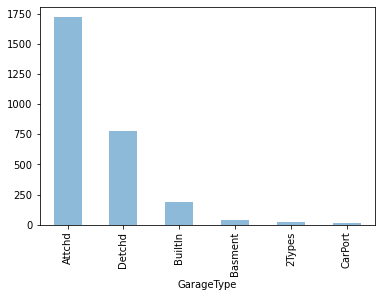

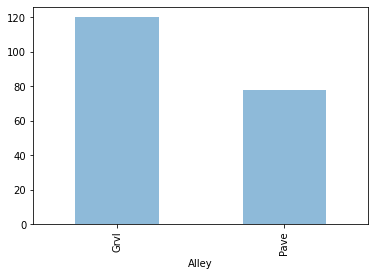

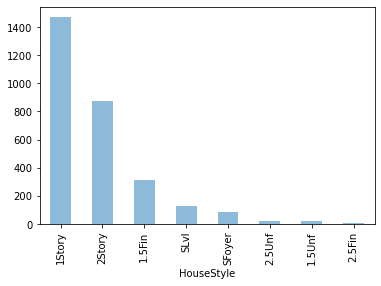

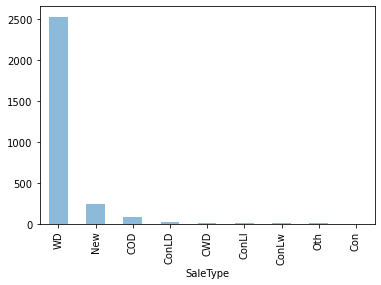

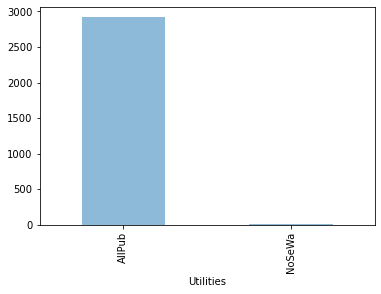

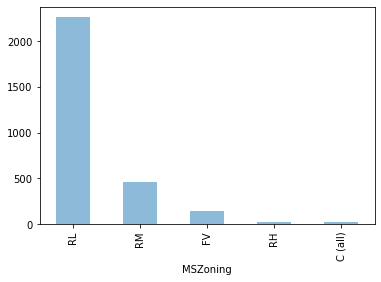

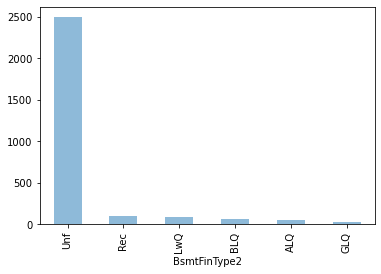

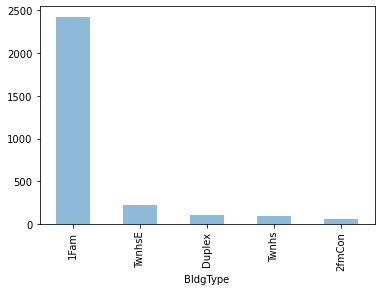

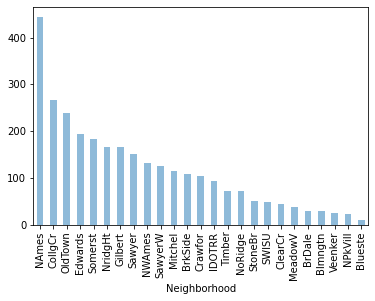

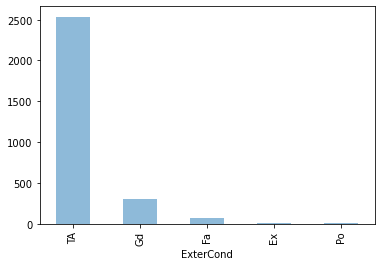

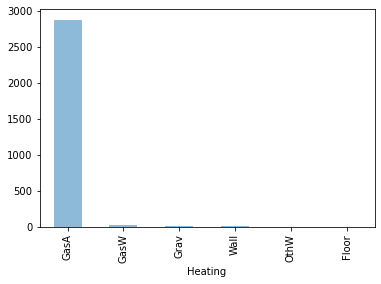

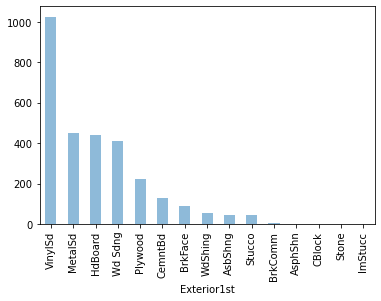

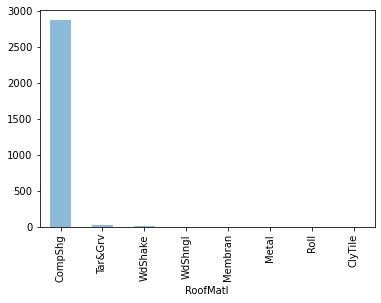

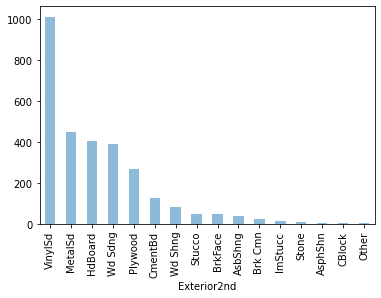

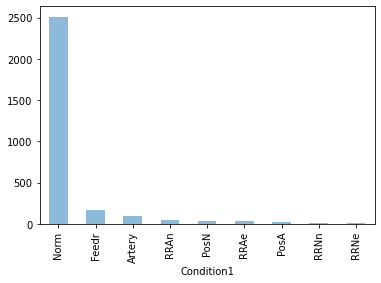

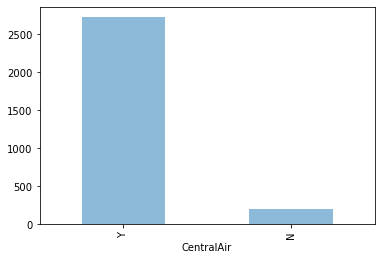

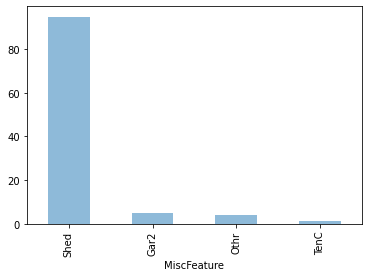

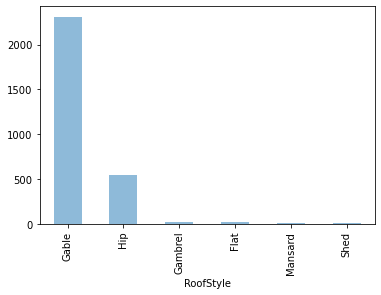

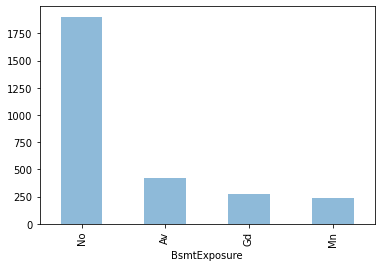

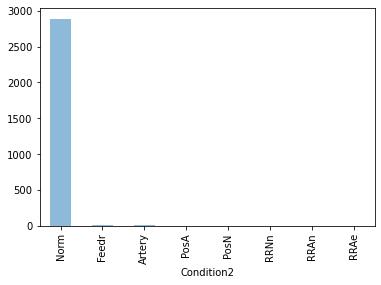

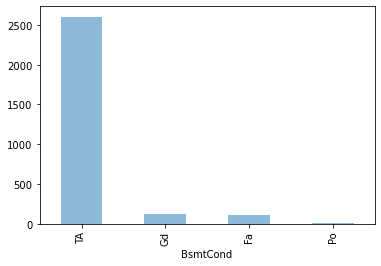

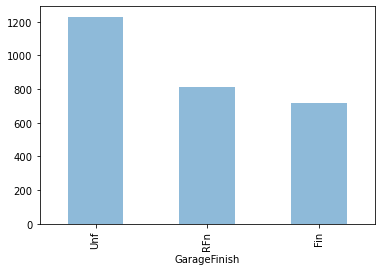

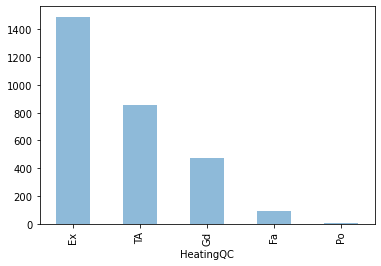

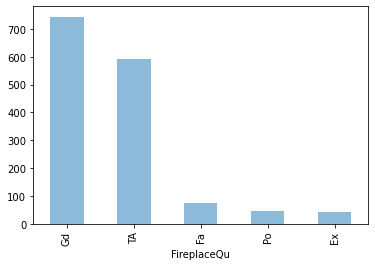

In [45]:
for col in col_cat:
    housing_df[col].value_counts().plot(kind='bar',alpha=0.5)
    plt.xlabel(col)
    plt.show()

### Fill Na with Mode

In [46]:
housing_df = housing_df.fillna(housing_df.mode().iloc[0])

### One-Hot Encoding for Categorical features

In [47]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_df_1hot = cat_encoder.fit_transform(housing_df[col_cat])

In [48]:
housing_df_1hot.toarray()

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
cat_encoder.categories_

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['N', 'P', 'Y'], dtype=object),
 array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object),
 array(['GdPrv', 'GdWo', 'MnPrv', 'MnWw'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
       dtype=object),
 array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'F

In [50]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train/test
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000.0,1


In [51]:
housing_df.values

array([[1, 60, 'RL', ..., 'Normal', 208500.0, 1],
       [2, 20, 'RL', ..., 'Normal', 181500.0, 1],
       [3, 60, 'RL', ..., 'Normal', 223500.0, 1],
       ...,
       [2917, 20, 'RL', ..., 'Abnorml', 140000.0, 0],
       [2918, 85, 'RL', ..., 'Normal', 140000.0, 0],
       [2919, 60, 'RL', ..., 'Normal', 140000.0, 0]], dtype=object)

In [52]:
list(housing_df.columns).index('YrSold')

77

In [53]:
from sklearn.preprocessing import FunctionTransformer
index_YrSold = list(housing_df.columns).index('YrSold')
index_YrBuilt = list(housing_df.columns).index('YearBuilt')
def calculateAge(X):
    house_age = X[:,index_YrSold] - X[:,index_YrBuilt]
    return np.c_[X,house_age]

attr_adder = FunctionTransformer(calculateAge,validate=False)
housing_extra_attr = attr_adder.fit_transform(housing_df.values)


In [54]:
housing_extra_attr = pd.DataFrame(
    housing_extra_attr,
    columns = list(housing_df) + ['house_age'],
    index=housing_df.index)
housing_extra_attr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train/test,house_age
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500,1,5
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500,1,31
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500,1,7
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,1,91
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000,1,8


In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
index_YrSold = list(housing_df[col_num].columns).index('YrSold')
index_YrBuilt = list(housing_df[col_num].columns).index('YearBuilt')
num_Pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attr_adder',FunctionTransformer(calculateAge,validate=False)),
    ('std_scaler',StandardScaler()),
])
housing_num_tr = num_Pipeline.fit_transform(housing_df[col_num])

In [57]:
housing_num_tr

array([[-1.73145754,  0.06733141, -0.12767816, ...,  0.80354646,
         0.99965748, -1.03788118],
       [-1.7302708 , -0.87361603,  0.56712524, ...,  0.3518564 ,
         0.99965748, -0.18067197],
       [-1.72908405,  0.06733141,  0.01128252, ...,  1.05448538,
         0.99965748, -0.97194201],
       ...,
       [ 1.72908405, -0.87361603,  4.27274338, ..., -0.34240796,
        -1.00034264,  0.3138718 ],
       [ 1.7302708 ,  0.65542357, -0.26663884, ..., -0.34240796,
        -1.00034264, -0.74115491],
       [ 1.73145754,  0.06733141,  0.28920388, ..., -0.34240796,
        -1.00034264, -0.7741245 ]])

In [58]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num",num_Pipeline, col_num),
    ("cat",OneHotEncoder(),col_cat),
    ])

housing_prepared = full_pipeline.fit_transform(housing_df)

In [59]:
housing_prepared

<2919x292 sparse matrix of type '<class 'numpy.float64'>'
	with 242276 stored elements in Compressed Sparse Row format>

In [60]:
housing_df.shape

(2919, 82)

## Simple Linear Regression

In [61]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train/test
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000.0,1


In [67]:
from sklearn.model_selection import train_test_split

train = housing_df[housing_df['train/test']==1]
train = train.drop(columns='train/test')
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)


In [68]:
X = train_set.iloc[:,:-1]
y = train_set.iloc[:,-1]

In [69]:
col_num.remove('train/test')
col_num.remove('SalePrice')

In [70]:
index_YrSold = list(X[col_num].columns).index('YrSold')
index_YrBuilt = list(X[col_num].columns).index('YearBuilt')

In [71]:
train_set_mod = full_pipeline.fit_transform(X)

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_mod,y)

LinearRegression()

In [73]:
housing = housing_df[housing_df['train/test']==1]
housing = housing.iloc[:,:-1]
some_data = housing.iloc[:5,:-1]
some_labels = housing.iloc[:5,-1]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [208285.64805243 213121.00196067 209433.7515217  158344.92949268
 288042.28734784]


In [74]:
print(some_labels)

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64


In [75]:
from sklearn.metrics import mean_squared_error

housing_pred = lin_reg.predict(train_set_mod)
lin_mse = mean_squared_error(y,housing_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

19496.217985107927


In [76]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y,housing_pred)
lin_mae

12668.96281240439

## Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set_mod,y)

DecisionTreeRegressor(random_state=42)

In [78]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [79]:
housing_pred = tree_reg.predict(train_set_mod)
tree_mse = mean_squared_error(y,housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Fine Tune model

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_set_mod, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [36778.85689909 35865.95563028 48103.29742718 47173.39847204
 52206.7232316  49702.74247021 38557.04463641 34284.58967482
 40786.67529036 33219.54303971]
Mean: 41667.882677170084
Standard deviation: 6642.722542577292


In [82]:
lin_scores = cross_val_score(lin_reg, train_set_mod, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [21476.14009129 34604.22217353 23219.23702632 48555.59517976
 57769.07879758 30381.66573621 52225.15604006 21770.15835622
 41217.50378329 23563.8107605 ]
Mean: 35478.25679447607
Standard deviation: 12977.839253999535


## Ensemble methods

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(train_set_mod, y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [84]:
housing_predictions = forest_reg.predict(train_set_mod)
forest_mse = mean_squared_error(y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

14644.620033533363

## Cross-Validation

In [86]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_set_mod, y, 
                               scoring = "neg_mean_squared_error",cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores: [21780.59289028 35857.19896022 27908.28581449 44419.86372296
 44680.31685093 38479.13834922 30634.43823908 24701.62114545
 26985.37749253 28473.76655362]
Mean: 32392.06000187704
Standard deviation: 7643.64977050569


In [88]:
scores = cross_val_score(lin_reg,train_set_mod,y,
                        scoring = "neg_mean_squared_error",cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     35478.256794
std      13679.843717
min      21476.140091
25%      23305.380460
50%      32492.943955
75%      46721.072331
max      57769.078798
dtype: float64

In [94]:
sqscores = np.sqrt(-scores)
display_scores(sqscores)

Scores: [21476.14009129 34604.22217353 23219.23702632 48555.59517976
 57769.07879758 30381.66573621 52225.15604006 21770.15835622
 41217.50378329 23563.8107605 ]
Mean: 35478.25679447607
Standard deviation: 12977.839253999535


In [91]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_set_mod,y)
housing_prediction = svm_reg.predict(train_set_mod)
svm_mse = mean_squared_error(y,housing_prediction)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

72579.748721988

In [102]:
svm_score = cross_val_score(svm_reg,train_set_mod,y,
                     scoring="neg_mean_squared_error",cv=10)
svm_rmse_score = np.sqrt(-svm_score)
display_scores(svm_score)

Scores: [-4.12574372e+09 -8.24963343e+09 -5.09977957e+09 -4.80200818e+09
 -5.77620770e+09 -7.14859536e+09 -4.57228543e+09 -4.80858317e+09
 -3.74583498e+09 -5.33993584e+09]
Mean: -5366860738.692776
Standard deviation: 1309761697.4844503


## Grid Search

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(train_set_mod,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [105]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

46212.99004544083 {'max_features': 2, 'n_estimators': 3}
38580.169913470825 {'max_features': 2, 'n_estimators': 10}
37698.48221392955 {'max_features': 2, 'n_estimators': 30}
44523.23164581586 {'max_features': 4, 'n_estimators': 3}
36739.43100846212 {'max_features': 4, 'n_estimators': 10}
35337.10271005646 {'max_features': 4, 'n_estimators': 30}
43834.97170334294 {'max_features': 6, 'n_estimators': 3}
36821.9762723872 {'max_features': 6, 'n_estimators': 10}
34471.08498012938 {'max_features': 6, 'n_estimators': 30}
45288.00504477682 {'max_features': 8, 'n_estimators': 3}
37054.89138021054 {'max_features': 8, 'n_estimators': 10}
33809.804117841784 {'max_features': 8, 'n_estimators': 30}
43355.503760467094 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
37198.2258874804 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
43900.88607601805 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
36120.26037847038 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [107]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016656,0.001222,0.001454,0.000070,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-2.235548e+09,-1.625145e+09,-2.728654e+09,-2.096838e+09,-1.992018e+09,-2.135640e+09,3.589947e+08,18,-5.038863e+08,-5.919517e+08,-5.408084e+08,-5.590824e+08,-4.744947e+08,-5.340447e+08,4.118637e+07
1,0.046444,0.000258,0.002718,0.000033,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.760822e+09,-1.156117e+09,-2.206537e+09,-1.271473e+09,-1.047199e+09,-1.488430e+09,4.340651e+08,11,-2.897204e+08,-2.796980e+08,-2.462791e+08,-2.525617e+08,-2.713860e+08,-2.679290e+08,1.631072e+07
2,0.133184,0.001412,0.006044,0.000103,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.765387e+09,-1.125869e+09,-2.044406e+09,-1.212627e+09,-9.575886e+08,-1.421176e+09,4.129188e+08,10,-2.283618e+08,-2.255993e+08,-1.886752e+08,-1.979515e+08,-2.157830e+08,-2.112742e+08,1.552891e+07
3,0.017445,0.000255,0.001445,0.000035,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.680015e+09,-1.873947e+09,-2.655745e+09,-2.131255e+09,-1.570629e+09,-1.982318e+09,3.868607e+08,16,-5.339490e+08,-4.534600e+08,-5.134378e+08,-5.154025e+08,-5.833870e+08,-5.199273e+08,4.172346e+07
4,0.057516,0.005733,0.003197,0.000555,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.450016e+09,-1.130425e+09,-1.922697e+09,-1.337457e+09,-9.083323e+08,-1.349786e+09,3.410062e+08,6,-2.960302e+08,-2.755687e+08,-2.591955e+08,-2.311926e+08,-2.731657e+08,-2.670306e+08,2.143486e+07
5,0.148713,0.002414,0.006042,0.000066,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.328342e+09,-9.212687e+08,-1.773508e+09,-1.288949e+09,-9.314860e+08,-1.248711e+09,3.134398e+08,3,-2.130024e+08,-1.961813e+08,-1.730362e+08,-1.948085e+08,-2.036113e+08,-1.961279e+08,1.323422e+07
6,0.019288,0.000298,0.001364,0.000041,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.957503e+09,-1.829346e+09,-2.425552e+09,-1.491947e+09,-1.903175e+09,-1.921505e+09,2.995691e+08,14,-4.487669e+08,-6.230569e+08,-4.036656e+08,-5.100818e+08,-4.893646e+08,-4.949872e+08,7.367123e+07
7,0.057808,0.000455,0.002861,0.000175,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.622325e+09,-1.215516e+09,-1.766561e+09,-1.148557e+09,-1.026330e+09,-1.355858e+09,2.866845e+08,7,-2.367276e+08,-2.555441e+08,-2.168921e+08,-2.235457e+08,-2.433597e+08,-2.352138e+08,1.381158e+07
8,0.166435,0.000749,0.006008,0.000010,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.467433e+09,-1.027779e+09,-1.668723e+09,-9.877742e+08,-7.895694e+08,-1.188256e+09,3.267063e+08,2,-1.848856e+08,-1.837226e+08,-1.607420e+08,-1.771096e+08,-1.889069e+08,-1.790733e+08,9.919583e+06
9,0.021530,0.000192,0.001483,0.000054,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2.647168e+09,-2.092085e+09,-2.412987e+09,-1.427226e+09,-1.675551e+09,-2.051003e+09,4.512637e+08,17,-4.979031e+08,-5.822520e+08,-4.226241e+08,-5.152129e+08,-5.624399e+08,-5.160864e+08,5.584465e+07


In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV (forest_reg, param_distributions=param_dist,
                                n_iter=10, cv=5, scoring="neg_mean_squared_error",random_state=42)
rnd_search.fit(train_set_mod,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c76695d50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c76695c90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [111]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [113]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [129]:
extra_att = ['house_age']
cat_encoder = full_pipeline.named_transformers_["cat"]
categories = cat_encoder.categories_
cat_one_hot_att = []
for i in range(len(categories)):
    cat_one_hot_att += list(categories[i])
attribs = col_num + extra_att + cat_one_hot_att


In [131]:
sorted(zip(feature_importance,attribs),reverse=True)

[(0.05427203174661914, 'GrLivArea'),
 (0.04659881734143271, 'OverallQual'),
 (0.039876214620141945, 'TotalBsmtSF'),
 (0.033183275236418806, 'TA'),
 (0.031241395647720837, 'BsmtFinSF1'),
 (0.029876481763138365, 'GarageCars'),
 (0.0285731484839979, 'GarageArea'),
 (0.02713257657319239, 'LotArea'),
 (0.02489515649494744, '2ndFlrSF'),
 (0.02458697491017835, 'GarageYrBlt'),
 (0.02452059925168825, 'YearRemodAdd'),
 (0.023621889602745357, 'Fireplaces'),
 (0.02355848213659145, '1stFlrSF'),
 (0.023412221675836523, 'house_age'),
 (0.02133561298993252, 'Ex'),
 (0.017156659724189414, 'PConc'),
 (0.01680947323960274, 'Fin'),
 (0.01636024259423392, 'GLQ'),
 (0.015437697844640353, 'MasVnrArea'),
 (0.014520628158894279, 'LotFrontage'),
 (0.01448763438954252, 'YearBuilt'),
 (0.014444232400766536, 'TotRmsAbvGrd'),
 (0.013659214122251361, 'TA'),
 (0.013371072553306107, 'Unf'),
 (0.012882073919618927, 'FullBath'),
 (0.012400701335009244, 'BsmtUnfSF'),
 (0.01121304113704133, 'Ex'),
 (0.011155249216569239, 

In [135]:
final_model = grid_search.best_estimator_
test = housing_df[housing_df['train/test']==0]
test = test.drop(columns='train/test')
X_test = test.iloc[:,:-1]
X_test_prep = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prep)

In [136]:
final_predictions

array([129865.        , 160955.66666667, 189322.5       , ...,
       151453.33333333, 134526.        , 212935.5       ])

In [138]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,140000.0
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,140000.0
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,140000.0
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,140000.0
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,140000.0


In [ ]:
result = pd.DataFrame()
result['Id']= test['Id']
result['SalePrice'] = final_predictions
result.to_csv('submission.csv',index=False)